# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [19]:
import matplotlib as mpl

In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784')
x, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [10]:
x.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

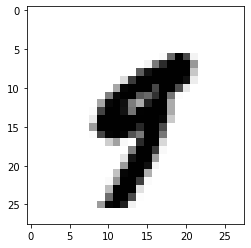

In [20]:
a=np.array(x.iloc[36000]).reshape(28, 28)
plt.imshow(a, cmap = mpl.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [21]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [22]:
x_train, x_test=x[:60000], x[60000:]
y_train, y_test=y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [36]:
y_5=np.where(y=='5', 1, 0)

In [38]:
len(y_5)

70000

In [39]:
y_train_5, y_test_5=y_5[:60000], y_5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train, y_train_5)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Does the classifier predict correctly the 36000th digit we picked before?

In [49]:
pred=model.predict(x_train)
pred[36000]

0

In [ ]:
# Yes, it gives 0 when we ask if it is number 5.

In [86]:
pred1=model.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 1, 0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [62]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [87]:
never_5_clf.fit(x_train, y_train_5)
pred2=never_5_clf.predict(x_test)

In [88]:
print(pred2)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [94]:
from sklearn import metrics
metrics.confusion_matrix(y_test_5, pred1)

array([[9034,   74],
       [ 147,  745]])

In [95]:
metrics.confusion_matrix(y_test_5, pred2)

array([[9108,    0],
       [ 892,    0]])

In [96]:
metrics.accuracy_score(y_test_5, pred1)

0.9779

In [97]:
metrics.accuracy_score(y_test_5, pred2)

0.9108

In [98]:
metrics.precision_score(y_test_5, pred1)

0.9096459096459096

In [99]:
metrics.precision_score(y_test_5, pred2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [100]:
metrics.recall_score(y_test_5, pred1)

0.8352017937219731

In [101]:
metrics.recall_score(y_test_5, pred2)

0.0

In [102]:
from sklearn.metrics import f1_score
metrics.f1_score(y_test_5, pred1)

0.8708357685563999


In [103]:
metrics.f1_score(y_test_5, pred2)

0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# When we check the accuracy score, they both show high accuracy. But when we look at the other metrics and the 
# confusion matrix, we see that Never5Classifier does not work, it is not able to differentiate the classes.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

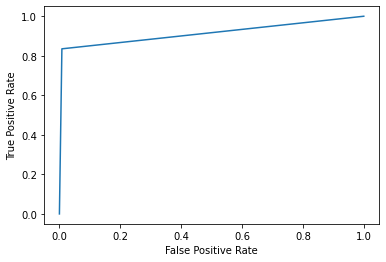

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_5, pred1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

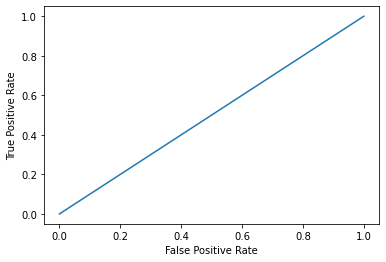

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_5, pred2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Now find the roc_auc_score for each. 

In [104]:
from sklearn.metrics import roc_auc_score
metrics.roc_auc_score(y_test_5, pred1)

0.9135385341029717

In [105]:
metrics.roc_auc_score(y_test_5, pred2)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The first one, logistic regression works better. 